**Wrangling the Allen Brain Cell Types Database: Importing it into the notebook**

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
df = pd.read_csv('cell_types_specimen_details.csv')
df

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,NaN,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,...,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
1,Oxtr-T2A-Cre,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,left,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,...,/api/v2/well_known_file_download/566738214,/api/v2/well_known_file_download/566738219,NaN,NaN,NaN,NaN,NaN,Mus musculus,563340157,Oxtr-T2A-Cre;Ai14-293837
2,Pvalb-IRES-Cre,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580,NaN,NaN,NaN,NaN,NaN,Mus musculus,319194354,Pvalb-IRES-Cre;Ai14(IVSCC)-170927
3,NaN,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,...,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
4,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,right,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186,NaN,NaN,NaN,NaN,NaN,Mus musculus,605622695,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Ctgf-T2A-dgCre,512322162,Ctgf-2A-dgCre;Ai14(IVSCC)-240529.03.02.01,right,305,"""Primary visual area, layer 6b""",VISp6b,385,VISp,6b,...,/api/v2/well_known_file_download/513878612,/api/v2/well_known_file_download/513878614,NaN,NaN,NaN,NaN,NaN,Mus musculus,511856495,Ctgf-2A-dgCre;Ai14(IVSCC)-240529
2327,Rorb-IRES2-Cre,488473535,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,left,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/488474970,/api/v2/well_known_file_download/491376689,NaN,NaN,NaN,NaN,NaN,Mus musculus,487607572,Rorb-IRES2-Cre-D;Ai14-212867
2328,Rorb-IRES2-Cre,467003163,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487623212,/api/v2/well_known_file_download/491378303,NaN,NaN,NaN,NaN,NaN,Mus musculus,322489498,Rorb-IRES2-Cre-D;Ai14(IVSCC)-172652
2329,Pvalb-IRES-Cre,572609946,Pvalb-IRES-Cre;Ai14-301945.04.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/575795570,/api/v2/well_known_file_download/575795572,NaN,NaN,NaN,NaN,NaN,Mus musculus,570930952,Pvalb-IRES-Cre;Ai14-301945


**Finding the columns in the dataset we just pulled.**

In [49]:
df.columns

Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'morph_thumb_path',
       'ephys_

**Performing PCA on a subset of the original dataset: specifically only data from VISp neurons.**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


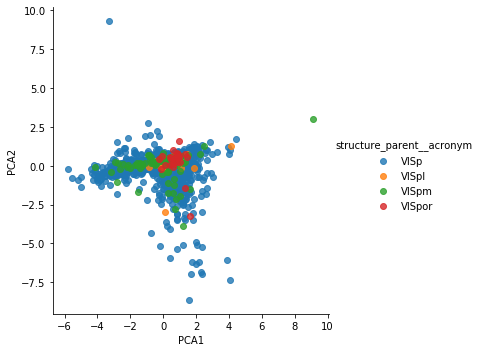

In [50]:
#using a dataframe with ONLY visP data
df_VISp = df[df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)
visp_features = df_VISp[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
x_data = visp_features.drop('structure_parent__acronym',axis=1)
x_data = (x_data - x_data.mean())/x_data.std()
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components = 2)           
X_2D = pca.fit_transform(x_data)  
visp_features['PCA1'] = X_2D[:, 0]
visp_features['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visp_features, fit_reg=False)
plt.show()

**We find that most of the clusters are centralized around a similar area - the clusters seem to overlap. We will perform a KMeans of 4 clusters, since there are 4 VISp regions, to determine whether the 4 clusters observed in the PCA plot are similar to the 4 clusters from the KMeans model.**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


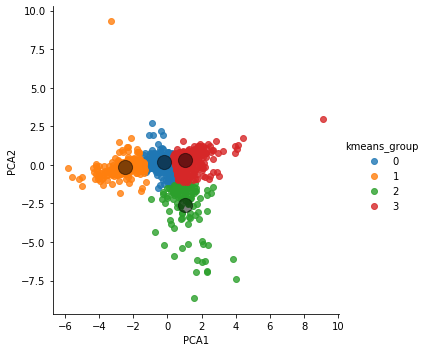

In [51]:
from sklearn.cluster import KMeans #Import the KMeans model

kmeans = KMeans(n_clusters=4) # Set up a kmeans model with 3 clusters

kmeans.fit(X_2D) # Fit our two dimensional data
y_kmeans = kmeans.predict(X_2D) 
visp_features['kmeans_group'] = y_kmeans

sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=visp_features, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

**The KMeans model with 4 clusters is vastly different from the 4 clusters we find in our PCA model. This makes sense, because our PCA model shows 4 clusters centered around the same region rather than being equally distributed among the data points.**

**Again, we perform a PCA for a subset of the original dataset that only contains data from VISl neurons.**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


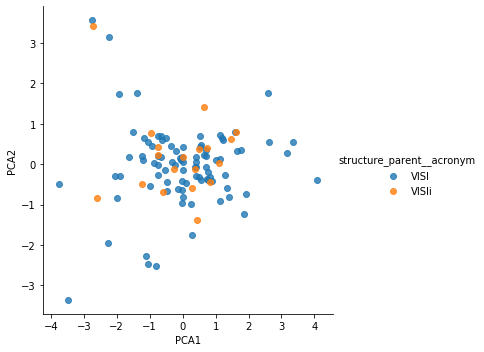

In [53]:
#using a dataframe with ONLY visL data
df_VISl = df[df['structure_parent__acronym'].str.contains('VISl')].reset_index(drop=True).fillna(0)
visl_features = df_VISl[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
x_data = visl_features.drop('structure_parent__acronym',axis=1)
x_data = (x_data - x_data.mean())/x_data.std()
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components = 2)           
X_2D = pca.fit_transform(x_data)  
visl_features['PCA1'] = X_2D[:, 0]
visl_features['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visl_features, fit_reg=False)
plt.show()

**Here, we find little to no clustering. We will perform a KMeans of 2 clusters, since there are 2 VISl regions, to confirm that the partition of data from the 2 regions of VISl observed in the PCA plot vastly differs from a KMeans model prediction of 2 clusters from the data.**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


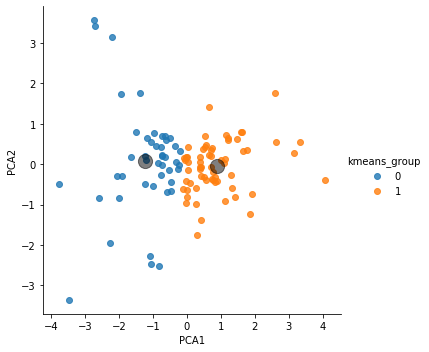

In [54]:
from sklearn.cluster import KMeans #Import the KMeans model

kmeans = KMeans(n_clusters=2) # Set up a kmeans model with 3 clusters

kmeans.fit(X_2D) # Fit our two dimensional data
y_kmeans = kmeans.predict(X_2D) 
visl_features['kmeans_group'] = y_kmeans

sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=visl_features, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

probably unnecessary graphs: covariance matrices and eigenvectors

In [66]:
#visP data
from scipy import stats
import matplotlib.pyplot as plt
df_VISp = df[df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)
visp_features = df_VISp[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation']]
visp_features = (visp_features - visp_features.mean())/visp_features.std()
visp_features.head()

,ef__avg_firing_rate,ef__peak_t_ramp,ef__tau,ef__adaptation
0,-0.863892,2.258378,-0.612495,-0.481619
1,1.549841,1.500497,-1.281417,-0.474952
2,-0.481505,0.649493,-1.183927,-0.638272
3,-0.323776,-0.770389,0.253041,-0.146062
4,-0.543520,-0.625083,0.497025,-0.204249


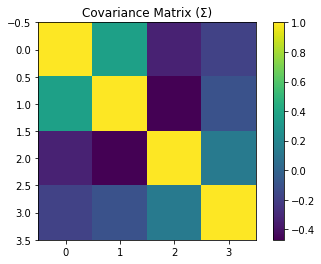

In [68]:
#covariance matrix for visP
cov_visp = visp_features.cov()

plt.imshow(cov_visp)
plt.colorbar()
plt.title('Covariance Matrix (\u03A3)')
plt.show()

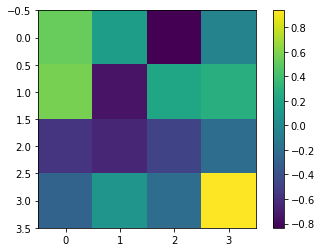

3.999999999999993


In [67]:
#eigenvectors for visP
eigenvectors, eigenvalues = np.linalg.eig(cov_visp)

plt.imshow(eigenvalues)
plt.colorbar()
plt.show()
eigenSum = np.sum(eigenvectors)
print(eigenSum)

In [69]:
#visL data
df_VISl = df[df['structure_parent__acronym'].str.contains('VISl')].reset_index(drop=True).fillna(0)
visl_features = df_VISl[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation']]
visl_features = (visl_features - visl_features.mean())/visl_features.std()
visl_features.head()

,ef__avg_firing_rate,ef__peak_t_ramp,ef__tau,ef__adaptation
0,-0.516927,-0.075436,-0.521705,-0.262935
1,-0.844255,4.157333,-1.359724,-0.603046
2,-0.429554,-0.094005,-0.993549,-0.690704
3,2.151836,-1.427893,-0.916276,-0.592099
4,-0.253639,0.639252,0.232748,-0.603046


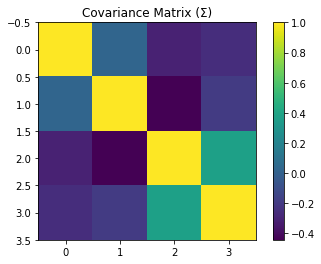

In [70]:
#covariance matrix for visL
cov_visl = visl_features.cov()

plt.imshow(cov_visl)
plt.colorbar()
plt.title('Covariance Matrix (\u03A3)')
plt.show()

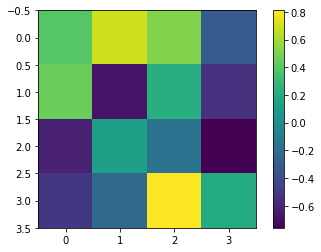

4.0


In [71]:
#eigenvectors for visL
eigenvectors, eigenvalues = np.linalg.eig(cov_visl)

plt.imshow(eigenvalues)
plt.colorbar()
plt.show()
eigenSum = np.sum(eigenvectors)
print(eigenSum)